#### Student Information
Name: 葉育成

Student ID: 107011571

GitHub ID: EricYehYC

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

# First:

In [89]:
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import matplotlib.pyplot as plt

In [2]:
"""
Copy the code from DMlab1
"""
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [ ]:
# Answer here


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [5]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
pandas.isnull() function is using for detecting the missing values like NaN in numeric arrays, None or NaN in object arrays,...etc.

In the code above, A, B and E are missing values, but C, D and F are "string" data type.

That's why the result of isnull() function didn't work like we imagine.



### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [18]:
X_sample = X.sample(n=1000) #random state

,text,category,category_name
2059,From: ederveen@athena.research.ptt.nl (Edervee...,1,comp.graphics
748,From: fulk@cs.rochester.edu (Mark Fulk) Subjec...,2,sci.med
495,From: se92psh@brunel.ac.uk (Peter Hauke) Subje...,1,comp.graphics
432,From: banschbach@vms.ocom.okstate.edu Subject:...,2,sci.med
1587,zaphod.mps.ohio-state.edu!wupost!uunet!olivea...,0,alt.atheism
403,Organization: Penn State University From: <SEC...,0,alt.atheism
1472,From: apodaca@spot.Colorado.EDU (mu'tafikah) S...,3,soc.religion.christian
1634,From: db7n+@andrew.cmu.edu (D. Andrew Byler) S...,3,soc.religion.christian
182,From: sigma@rahul.net (Kevin Martin) Subject: ...,1,comp.graphics
1443,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,0,alt.atheism


In [27]:
print(X.iloc[2059])
print(X.iloc[748])
print(X.iloc[495])
print(X.iloc[432])
X_sample.iloc[0:4]

text             From: ederveen@athena.research.ptt.nl (Edervee...
category                                                         1
category_name                                        comp.graphics
Name: 2059, dtype: object
text             From: fulk@cs.rochester.edu (Mark Fulk) Subjec...
category                                                         2
category_name                                              sci.med
Name: 748, dtype: object
text             From: se92psh@brunel.ac.uk (Peter Hauke) Subje...
category                                                         1
category_name                                        comp.graphics
Name: 495, dtype: object
text             From: banschbach@vms.ocom.okstate.edu Subject:...
category                                                         2
category_name                                              sci.med
Name: 432, dtype: object


,text,category,category_name
2059,From: ederveen@athena.research.ptt.nl (Edervee...,1,comp.graphics
748,From: fulk@cs.rochester.edu (Mark Fulk) Subjec...,2,sci.med
495,From: se92psh@brunel.ac.uk (Peter Hauke) Subje...,1,comp.graphics
432,From: banschbach@vms.ocom.okstate.edu Subject:...,2,sci.med


# Second:

In [54]:
amazon = []
f = open(r'sentiment labelled sentences/amazon_cells_labelled.txt')
lines = f.readlines()
for line in lines:
    sentence = line.split('\t')[0]
    label =int(line.split('\t')[1].split('\n')[0])
    amazon.append([sentence,label])
    
f.close()
amazon = pd.DataFrame(amazon,columns=["sentence","label"])
amazon["website"] = "amazon"

In [50]:
imdb = []
f = open(r'sentiment labelled sentences/imdb_labelled.txt',encoding="utf-8")
lines = f.readlines()
for line in lines:
    sentence = line.split('\t')[0]
    label =int(line.split('\t')[1].split('\n')[0])
    imdb.append([sentence,label])
    
f.close()
imdb = pd.DataFrame(imdb,columns=["sentence","label"])
imdb["website"] = "imdb"

In [49]:
yelp = []
f = open(r'sentiment labelled sentences/yelp_labelled.txt')
lines = f.readlines()
for line in lines:
    sentence = line.split('\t')[0]
    label =int(line.split('\t')[1].split('\n')[0])
    yelp.append([sentence,label])
    
f.close()
yelp = pd.DataFrame(yelp,columns=["sentence","label"])
yelp["website"] = "yelp"

In [61]:
data = pd.concat([amazon,imdb,yelp])

## Find missing value、duplicate data

In [69]:
data.isnull()
data.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)
data.isnull().apply(lambda x: dmh.check_missing_values(x))
#There are no missing value!!

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
website     (The amoung of missing records is: , 0)
dtype: object

In [86]:
sum(data.duplicated())

17

In [88]:
duplicate = data.loc[lambda x : data.duplicated()]
duplicate
#There are 17 duplicate datas!!

,sentence,label,website
285,Great phone!.,1,amazon
407,Works great.,1,amazon
524,Works great!.,1,amazon
543,Don't buy this product.,0,amazon
744,If you like a loud buzzing to override all you...,0,amazon
748,Does not fit.,0,amazon
778,This is a great deal.,1,amazon
792,Great Phone.,1,amazon
892,Excellent product for the price.,1,amazon
896,Great phone.,1,amazon


## Data preprocessing

### Sampling

In [93]:
data_sample = data.sample(n=1000)
data_sample[0:5]

,sentence,label,website
177,"The atmosphere is modern and hip, while mainta...",1,yelp
460,Definitely not worth the $3 I paid.,0,yelp
17,I'll put this gem up against any movie in term...,1,imdb
936,The two main characters may be two of the most...,1,imdb
137,"IMDB ratings only go as low 1 for awful, it's ...",0,imdb


1    1500
0    1500
Name: label, dtype: int64


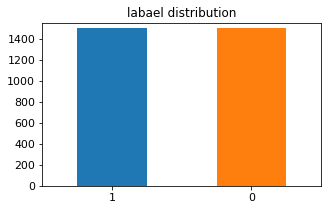

In [99]:
print(data.label.value_counts())
data.label.value_counts().plot(kind = 'bar',
                                    title = 'labael distribution',
                                    ylim = [0, 1550],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

0    501
1    499
Name: label, dtype: int64


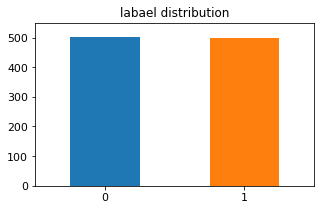

In [98]:
print(data_sample.label.value_counts())
data_sample.label.value_counts().plot(kind = 'bar',
                                    title = 'labael distribution',
                                    ylim = [0, 550],        
                                    rot = 0, fontsize = 11, figsize = (5,3))

In [118]:
#plt.figure(figsize=(7,5))
#plt.bar([0,1],data.label.value_counts(), width = 0.35,label="one")
#plt.bar([0,1],data_sample.label.value_counts(), width = 0.35,label="two")
#plt.show()
#plt.bar(data_sample.label.value_counts(),data.label.value_counts())

### Feature subset selection

In [142]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence[:20])

In [147]:
len(count_vect.get_feature_names())

131

In [144]:
#consider only first 20 feature_names of the first 20 data.
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]
plot_z = data_counts[0:20, 0:20].toarray()

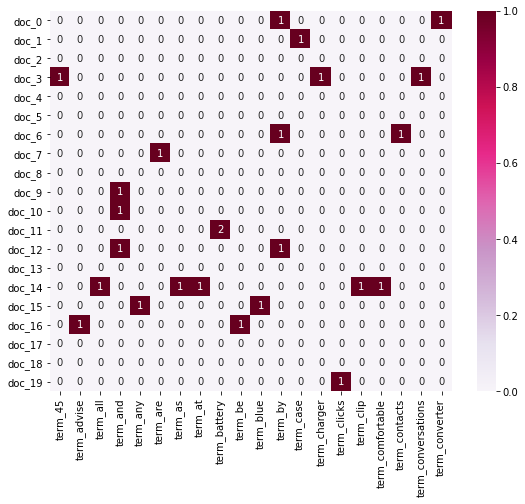

In [145]:
import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimensionality reduction

In [148]:
from sklearn.decomposition import PCA

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)

data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

In [149]:
print(data_counts.shape,"reduced into",data_reduced.shape)

(3000, 5155) reduced into (3000, 2)


In [ ]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['category_name'] == category].T[0]
    ys = data_reduced[data['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

# Third:

# Fourth:

# Fifth: